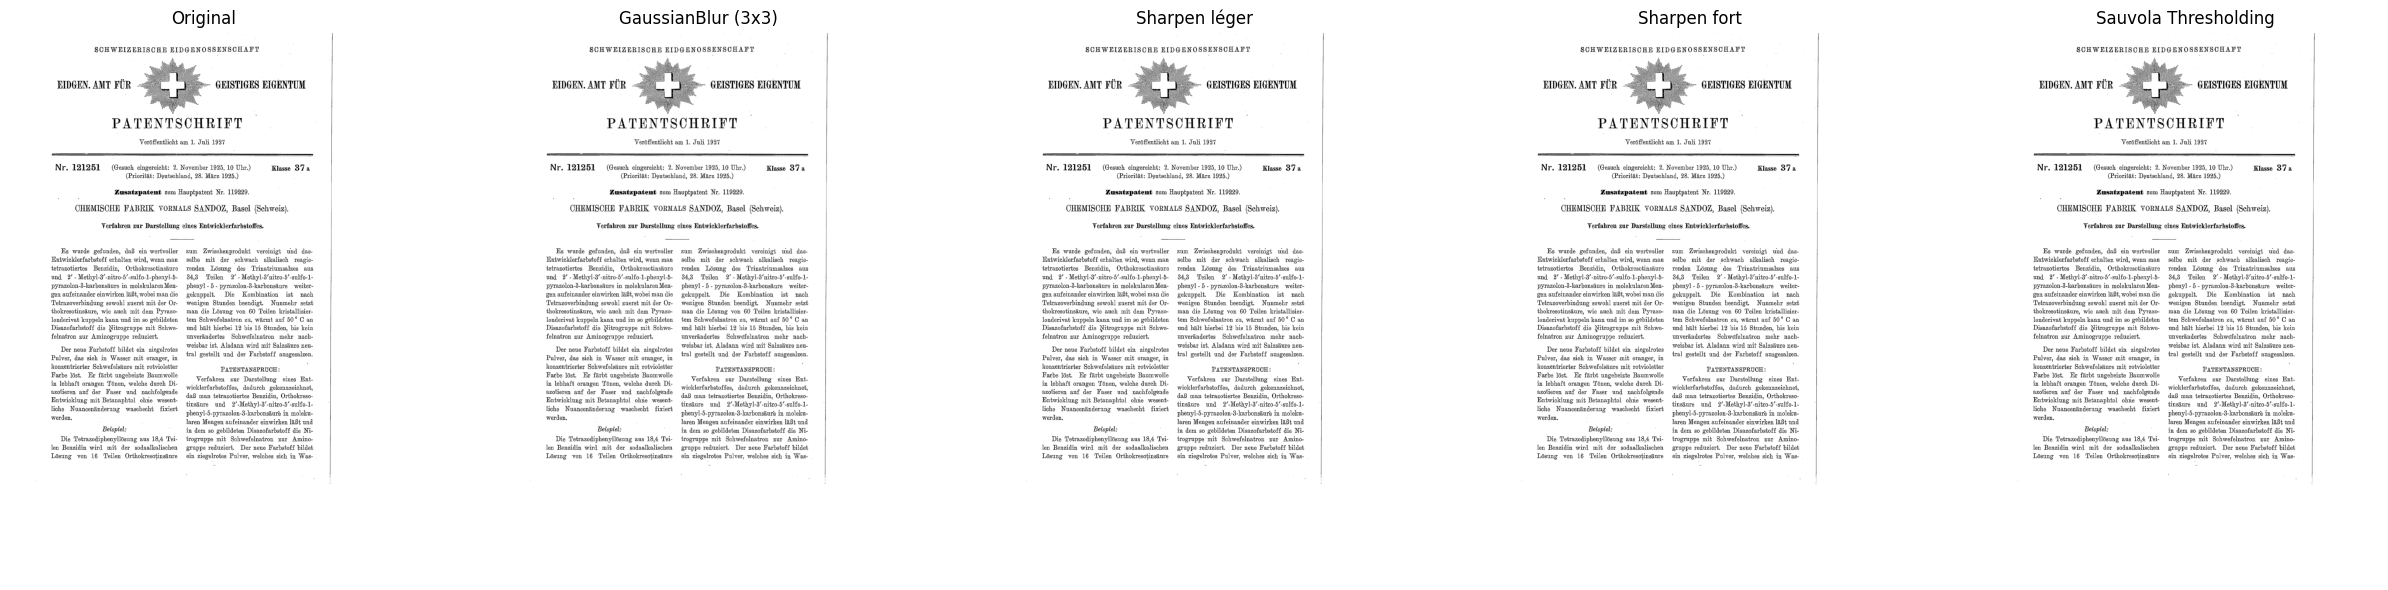

🧾 OCR résultats comparatifs:

— Original —
SCHWEIZERISCHE EIDGENOSSENSCHAFT

EIDGEN. AMT FÜR

GEISTIGES EIGENTUM

PATENTSCHRIFT

Veröffentlicht am 1. Juli 1927

Nr. 121251

(Gesuch eingereicht: 2. November 1925, 10 Uhr.)

Klasse 37 a

(Priorität: Deutschland, 28: März 1925.)

Zusatzpatent zum Hauptpatent Nr. 119229.
CHEMISCHE FABRIK VORMALS SANDOZ, Basel (Schweiz).

Verfahren zur Darstellung eines Entwicklerfarbstoffes,

Es wurde gefunden, daß ein wertvoller
Enntwicklerfarbstoff erhalten wird, wenn man
tetrazotiertes Benzidin, Orthokreso

— Flouté (GaussianBlur 3x3) —
SCHWEIZERISCHE EIDGENOSSENSCHAFT

Veröffentlicht am 1. Juli 1927

Nr. 121251

(Gesuch eingereicht: 2. November 1925, 10 Uhr.)

Klasse 37a

(Priorität: Deutschland, 28: März 1925.)

Zusatzpatent zum Hauptpatent Nr. 119229.
CHEMISCHE FABRIK VORMALS SANDOZ, Basel (Schweiz).

Verfahren zur Darstellung eines Entwicklerfarbstoffes.

Es wurde gefunden, daß ein wertvoller
Enntwicklerfarbstoff erhalten wird, wenn man
tetrazotierte

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
from PIL import Image
import pytesseract
from skimage import filters, img_as_ubyte
import numpy as np

def sauvola_threshold(gray, window=25, k=0.2):
    thresh_sauvola = filters.threshold_sauvola(gray, window_size=window, k=k)
    binary = gray > thresh_sauvola
    return img_as_ubyte(binary)

# --- 1️⃣ Charger la première page du PDF ---
pdf_path = "data/raw_pdf/CH-121251-A_full.pdf"
page = convert_from_path(pdf_path, dpi=300, first_page=1, last_page=1)[0]
gray = np.array(page.convert("L"))

# --- 2️⃣ Fonctions utiles ---
def unsharp_mask(gray, sigma=1.0, strength=1.5):
    blur = cv2.GaussianBlur(gray, (0, 0), sigma)
    return cv2.addWeighted(gray, 1 + strength, blur, -strength, 0)

def show_images(images, titles, cmap="gray"):
    n = len(images)
    plt.figure(figsize=(5*n, 6))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, n, i + 1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# --- 3️⃣ Versions de traitement ---
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
sharp_soft = unsharp_mask(gray, sigma=1.0, strength=1.0)
sharp_strong = unsharp_mask(gray, sigma=1.0, strength=2.5)
sauvola = sauvola_threshold(gray, window=25, k=0.3)
# --- 4️⃣ OCR sur chaque version ---
ocr_orig = pytesseract.image_to_string(gray, lang="deu")
ocr_blur = pytesseract.image_to_string(blurred, lang="deu")
ocr_sharp_soft = pytesseract.image_to_string(sharp_soft, lang="deu")
ocr_sharp_strong = pytesseract.image_to_string(sharp_strong, lang="deu")

# --- 5️⃣ Affichage comparatif ---
show_images(
    [gray, blurred, sharp_soft, sharp_strong, sauvola],
    ["Original", "GaussianBlur (3x3)", "Sharpen léger", "Sharpen fort","Sauvola Thresholding"]
)

# --- 6️⃣ Afficher les textes OCRisés ---
print("🧾 OCR résultats comparatifs:\n")
print("— Original —")
print(ocr_orig[:500])
print("\n— Flouté (GaussianBlur 3x3) —")
print(ocr_blur[:500])
print("\n— Sharpen léger —")
print(ocr_sharp_soft[:500])
print("\n— Sharpen fort —")
print(ocr_sharp_strong[:500])
